# Analyzing the Effects of Selected Socioeconomic Indicators on Chicago Communities (2008 - 2012) Using Python and SQL #

**Detailed explanation of the data can be found [here](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2).**

Loading SQL extension and establishing connection to Database

In [4]:
%load_ext sql
%sql ibm_db_sa://bzf41969:mgh+r22m10nbx2lb@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: bzf41969@BLUDB'

Importing pandas library and storing the dataset in a dataframe

In [5]:
import pandas
chi_soc_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chi_soc_data

 * ibm_db_sa://bzf41969:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB


'Persisted chi_soc_data'

Verifying that the data was successfully loaded

In [6]:
%sql SELECT * FROM chi_soc_data LIMIT 5

 * ibm_db_sa://bzf41969:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


**Dataset Variables Explanation:**
 - **"ca"**: Community Area Number; used to uniquely identify each row of the dataset. Serves as primary key.
 - **"community_area_name"**: Name of the region in the city of Chicago.
 - **"percent_of_housing_crowded"**: Percentage of occupied housing units with more than one person per room.
 - **"percent_households_below_poverty"**: Percent of households living below the federal poverty line.
 - **"percent_aged_16_unemployed"**: Percentage of individuals over 16 that are unemployed"
 - **"percent_aged_25_without_high_school_diploma"**: Percent of individuals over the age of 25 that have not graduated high school.
 - **"percent_aged_under_18_or_over_64"**: Percent of the population that are in the defined age range.
 - **"per_capita_income_"**: Per capita income of the community areas is estimated as the sum of tract-level aggregate incomes divided by the total population.
 - **"harship_index"**: Score that incorporates each of the six selected socioeconomic indicators.

Exploration of the Data Set

In [16]:
#Maximum hardship index value
%sql SELECT MAX(hardship_index) FROM chi_soc_data;

 * ibm_db_sa://bzf41969:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.


1
98.0


In [17]:
#Community areas with harship index greate than 50.0
%sql SELECT COUNT(*) FROM chi_soc_data WHERE hardship_index > 50.0;

 * ibm_db_sa://bzf41969:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.


1
38


In [18]:
# Community with the highest hardship index
%sql SELECT community_area_name FROM chi_soc_data WHERE hardship_index = 98.0;

 * ibm_db_sa://bzf41969:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


In [21]:
#Chicaog community areas with per capita income greater than $60,000
%sql SELECT community_area_name FROM chi_soc_data WHERE per_capita_income_ > 60000;

 * ibm_db_sa://bzf41969:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


Plotting the Data

In [22]:
#Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

 * ibm_db_sa://bzf41969:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.


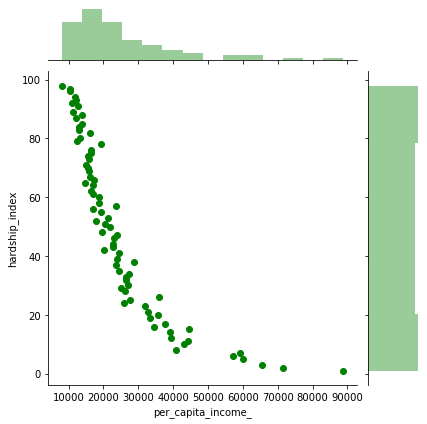

In [51]:
#Per capita income vs. hardship index of communities
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chi_soc_data;
plot1 = sns.jointplot(x= 'per_capita_income_', y= 'hardship_index', data = income_vs_hardship.DataFrame(), color = 'g')

There is a negative correlation between hardship index and per capita income. This result is sensical as the average income per area rises the relative "hardship" that the households in the communities have to go through would decrease.

 * ibm_db_sa://bzf41969:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.


Text(0, 0.5, 'Percent Household Below Poverty')

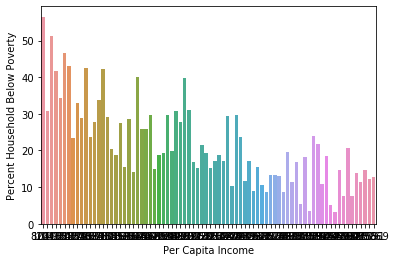

In [48]:
#Per capita income in relations to percentages of household within a given community that are below the poverty line
income_vs_households_below_poverty = %sql SELECT per_capita_income_, percent_households_below_poverty FROM chi_soc_data;
plot2 = sns.barplot(x= 'per_capita_income_', y= 'percent_households_below_poverty', data = income_vs_households_below_poverty.DataFrame())
plot2.set_xlabel('Per Capita Income')
plot2.set_ylabel('Percent Household Below Poverty')

Again, we see a negative correlation here. The results are logical as the relative income per area in the community increase, the number of households that are below poverty lines would decrease.

 * ibm_db_sa://bzf41969:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.


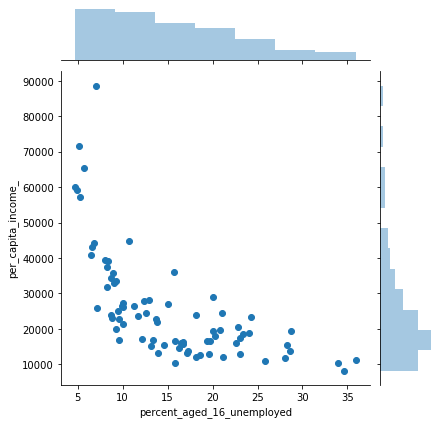

In [52]:
#Percentage of community population over the age of 16 that are unemployed vs. the per capita income
percent_over_16_vs_income = %sql SELECT percent_aged_16_unemployed, per_capita_income_ FROM chi_soc_data;
plot3 = sns.jointplot(x= 'percent_aged_16_unemployed', y= 'per_capita_income_', data = percent_over_16_vs_income.DataFrame())